Here we make a Singular value Decompoition of the Participant Input-Output Matrix

In [2]:
import numpy as np
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib.pyplot import ylabel
from matplotlib.font_manager import FontProperties

get the dir

In [3]:
# the name of our directory
dname = os.path.dirname(os.getcwd()) + "/data_loading/data_v2_quotes/"
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

Load our matrices of performance per trial and per block

In [87]:
in_out_matrix = np.load(dname + 'in_out_matrix.npy')
print(in_out_matrix.shape)

in_out_matrix_trialwise = np.load(dname + 'in_out_matrix_trialwise.npy')
print(in_out_matrix_trialwise.shape)


(7, 4, 8)
(7, 4, 128)


Perform the SVD

In [88]:
# u corresponds to left singular vectors, vt to right singular vectors, and s has singular values on the diagonal
test = in_out_matrix_trialwise[:,:,0]
u, s, vt = np.linalg.svd(test, full_matrices=False)
s = np.diag(s)

# change the sign of singular vectors for comparability with saxe et al. 2019
# multiplication of an eigenvector with a scalar retains the eigenvector
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

print(in_out_matrix[:,:,7].shape)
print(u.shape, s.shape, vt.shape)
print(u)
print(s)

(7, 4)
(7, 4) (4, 4) (4, 4)
[[ 0.2972019   0.54986779  0.42630916 -0.18348191]
 [ 0.33871117 -0.00762698  0.34561293  0.4699074 ]
 [ 0.36177505 -0.6199126   0.21630968 -0.06693373]
 [ 0.30938955  0.15873119  0.42550923 -0.30412849]
 [ 0.31042063 -0.11721788 -0.32718738 -0.72651761]
 [ 0.4933722   0.41447516 -0.58963862  0.24966844]
 [ 0.48017247 -0.32026604 -0.1274321   0.24162986]]
[[2.3149721  0.         0.         0.        ]
 [0.         0.54283307 0.         0.        ]
 [0.         0.         0.36469797 0.        ]
 [0.         0.         0.         0.15756839]]


Make some code to plot our matrices

C:\Users\Jirko\AppData\Local\Temp\ipykernel_15872\1414119352.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1,2,3,4], fontsize=15)


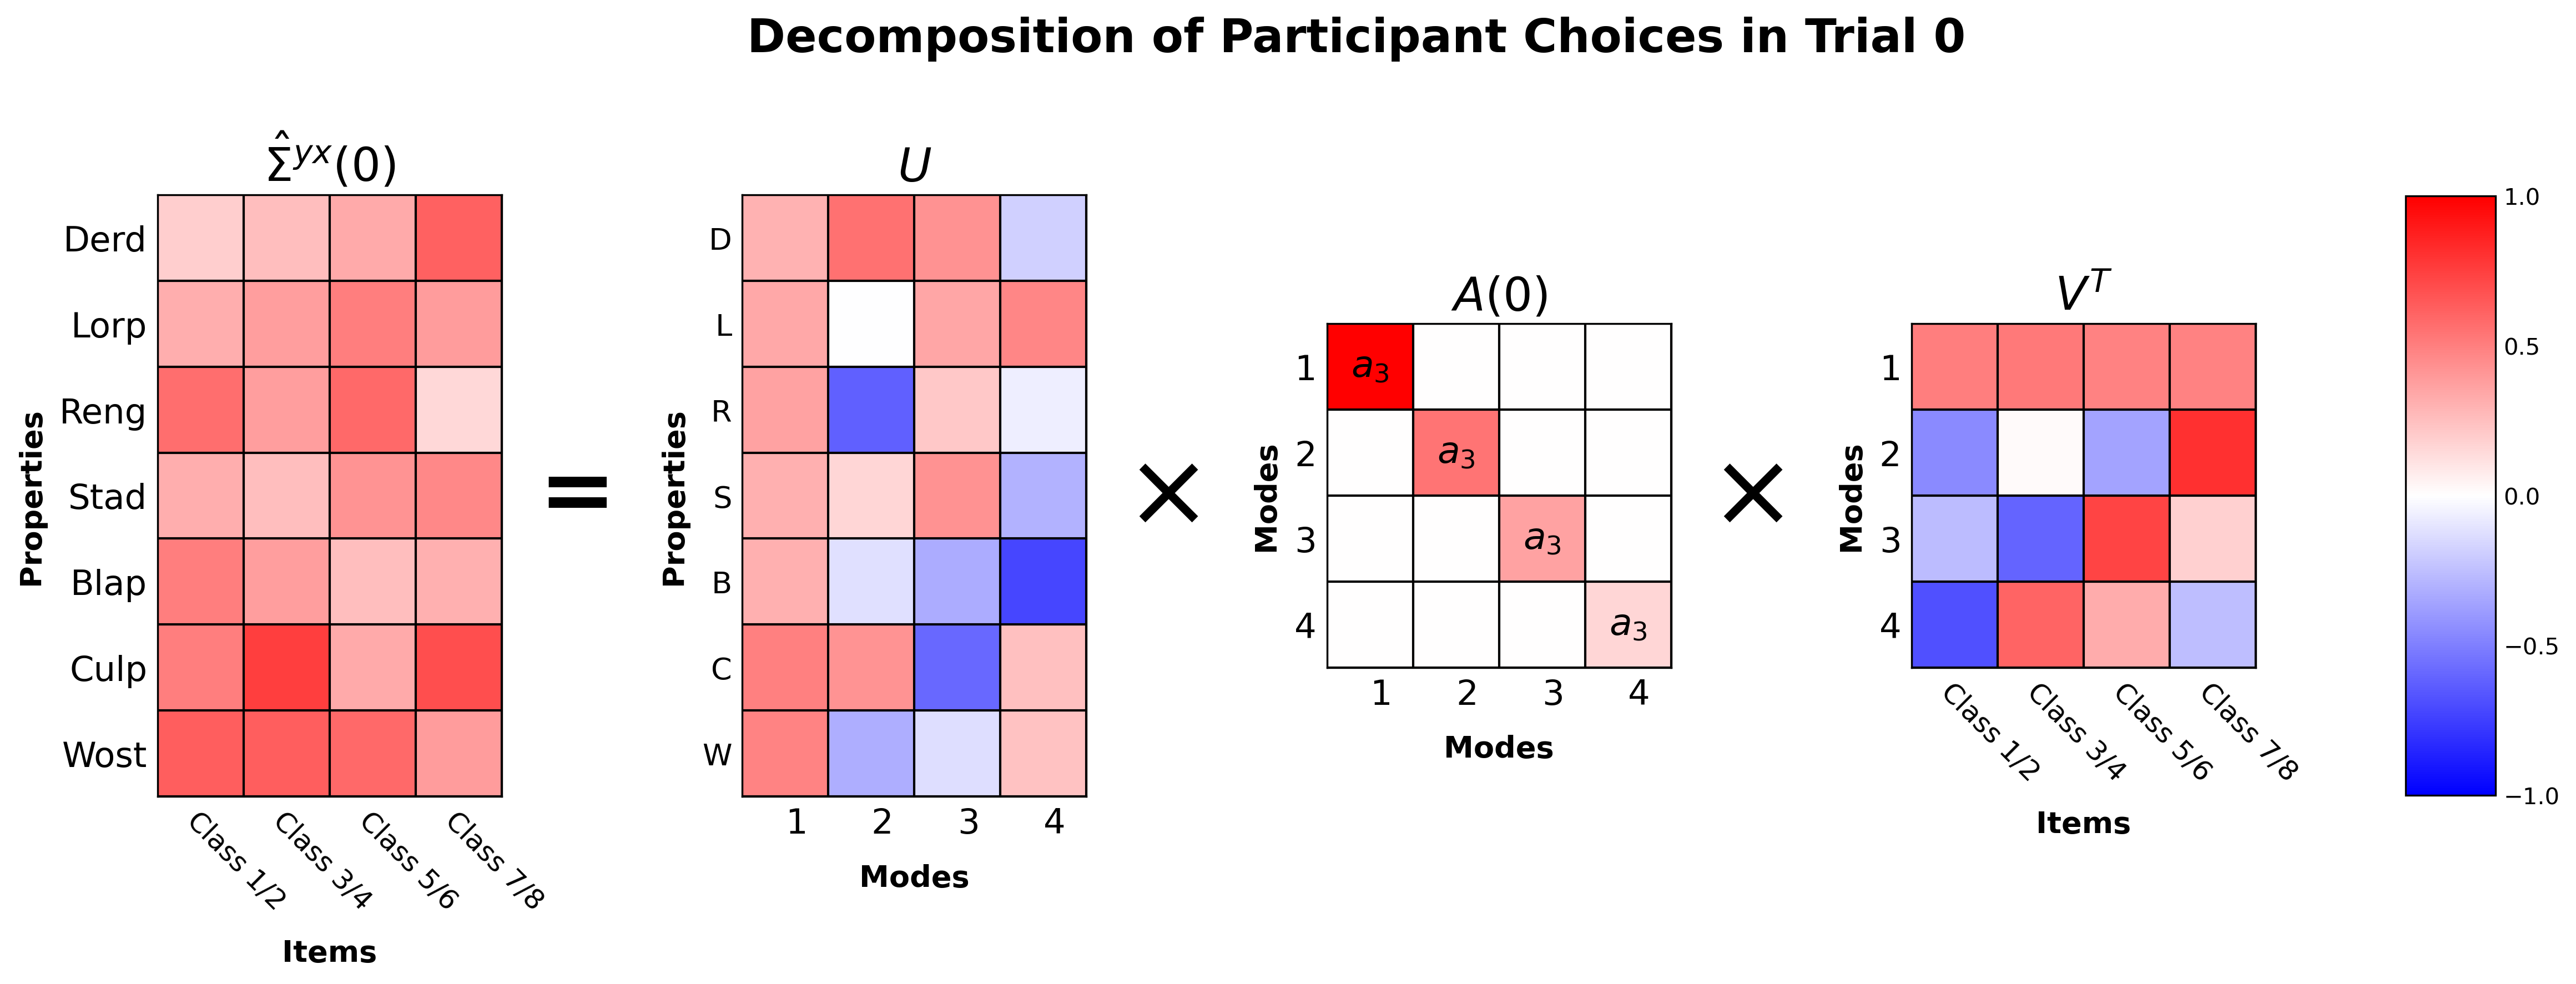

In [90]:
# custom function for the cmap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_SVD(u, s, vt, in_out_matrix, fig_name, fig_title, Block):
    """ a function to plot the input output matrix"""

    # Define figure
    fig, axes = plt.subplots(1, 4, figsize=(18, 6), dpi=300, facecolor='w')
    cmap = plt.get_cmap('bwr')

    # list of input, singular vectors and singular values for looping
    matrices = [in_out_matrix, u, s, vt]

    # Average per bloc
    for i, ax in enumerate(axes.flatten()):
        im = ax.matshow(matrices[i], cmap=cmap, vmin = -1, vmax = 1)

    # remove the ticks and make tick labels
    y_tick_labels_1 = ['Derd','Lorp','Reng','Stad', 'Blap', 'Culp', 'Wost']
    y_tick_labels_2 = ['D', 'L', 'R', 'S', 'B', 'C', 'W']
    x_tick_labels = ['Class 1/2', 'Class 3/4', 'Class 5/6', 'Class 7/8']

    # the titles 
    titles = ['$\hat{\Sigma}^{yx}(%s)$' % str(Block), '$U$', '$A(%s)$' % str(Block), '$V^{T}$']

    for i, ax in enumerate(axes.flatten()):
        
        sub_title = ax.set_title(titles[i], fontsize = 20)
        ax.tick_params(labeltop=False, labelbottom = True)

        if i in {0, 1}:

            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(y_tick_labels_1)), minor=True)

            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            ax.set_xticks(range(len(x_tick_labels)))

            # specific aspects of the two first axes 0 and 1
            if i == 0:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_1)))
                ax.set_yticklabels(y_tick_labels_1, fontsize=15)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")

                # y label is set
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)

            if i == 1:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_2)))
                ax.set_yticklabels(y_tick_labels_2, fontsize=13)
                ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
                # y label is set
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)


        if i in {2, 3}:
            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            # set x and y and remove add tick labels
            ax.set_xticks(range(len(x_tick_labels)))
            ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
            ax.set_yticklabels([0,1,2,3,4], fontsize=15)

            # set the y label
            ax.set_ylabel("Modes",fontweight='bold', fontsize = 13, labelpad=6)

            # specific aspects of the two first axes 2 and 3
            if i == 2:
                # set the x label 
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)

                # a little loop which draws the labels of our singular values in our cells <3
                for j in range(4):
                    ax.text(j, j, '$a_%s$' % str(i+1), va='center', ha='center', fontsize = 16)

            if i == 3:
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")


    # add a supertitle
    fig.suptitle(fig_title, fontweight='bold', fontsize = 20)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.7, 
                        hspace=0.4)

    # add a colourbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks = [-1,-.5, 0, .5, 1])
    cbar.ax.tick_params(size=0)

    # add equal sign
    fig.text(0.24, 0.5, '=', fontsize=40, fontweight='bold', ha='center', va='center')
    fig.text(0.435, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')
    fig.text(0.63, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')

    fig.savefig(fig_name)

# print(os.getcwd())
plot_SVD(u, s, vt, test, 
                  'figures/SVD_trial_1.svg', 
                  "Decomposition of Participant Choices in Trial 0",
                  0
                )

In [ ]:
test = np.array([[1,1,1,1],[1,1,0,0], [0,0,1,1], [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

u, s, vt = np.linalg.svd(test, full_matrices=False)

# change the sign of singular vectors for comparability with saxe et al. 2019
# multiplication of an eigenvector with a scalar retains the eigenvector
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

s = np.diag(s)
np.set_printoptions(suppress=True)

plot_SVD(u, s, vt, test, 
                  'figure/in_out_matrix.svg', 
                  "Proportion of Participant Choices Across Blocks",
                  "Block",
                  1
                )

In [79]:
# restore the original matrix as a sanity check, indeed our SVD worked!
restored = np.dot(np.dot(u, s), vt)
restored
s

array([[2.64575131, 0.        , 0.        , 0.        ],
       [0.        , 1.73205081, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

This all seems to work now we will perform the SVD across trials and across blocks

In [33]:
# we check the dimensionality of our matrix and 
# subsequently bring them in form which allows for SVD in stacked mode 
print(in_out_matrix.shape)
print(in_out_matrix_trialwise.shape)
# wrong shape, lets resize
in_out_matrix_new = np.moveaxis(in_out_matrix, 2, 0)
in_out_matrix_trialwise_new = np.moveaxis(in_out_matrix_trialwise, 2, 0)

print(in_out_matrix_new.shape)
print(in_out_matrix_trialwise_new.shape)

(7, 4, 8)
(7, 4, 128)
(8, 7, 4)
(128, 7, 4)


This works! Now we decompose on these 3d tensors

In [78]:
u, s, vt = np.linalg.svd(in_out_matrix_new, full_matrices=False)
u.shape, s.shape, vt.shape

((8, 7, 4), (8, 4), (8, 4, 4))

Now we can plot the singular values

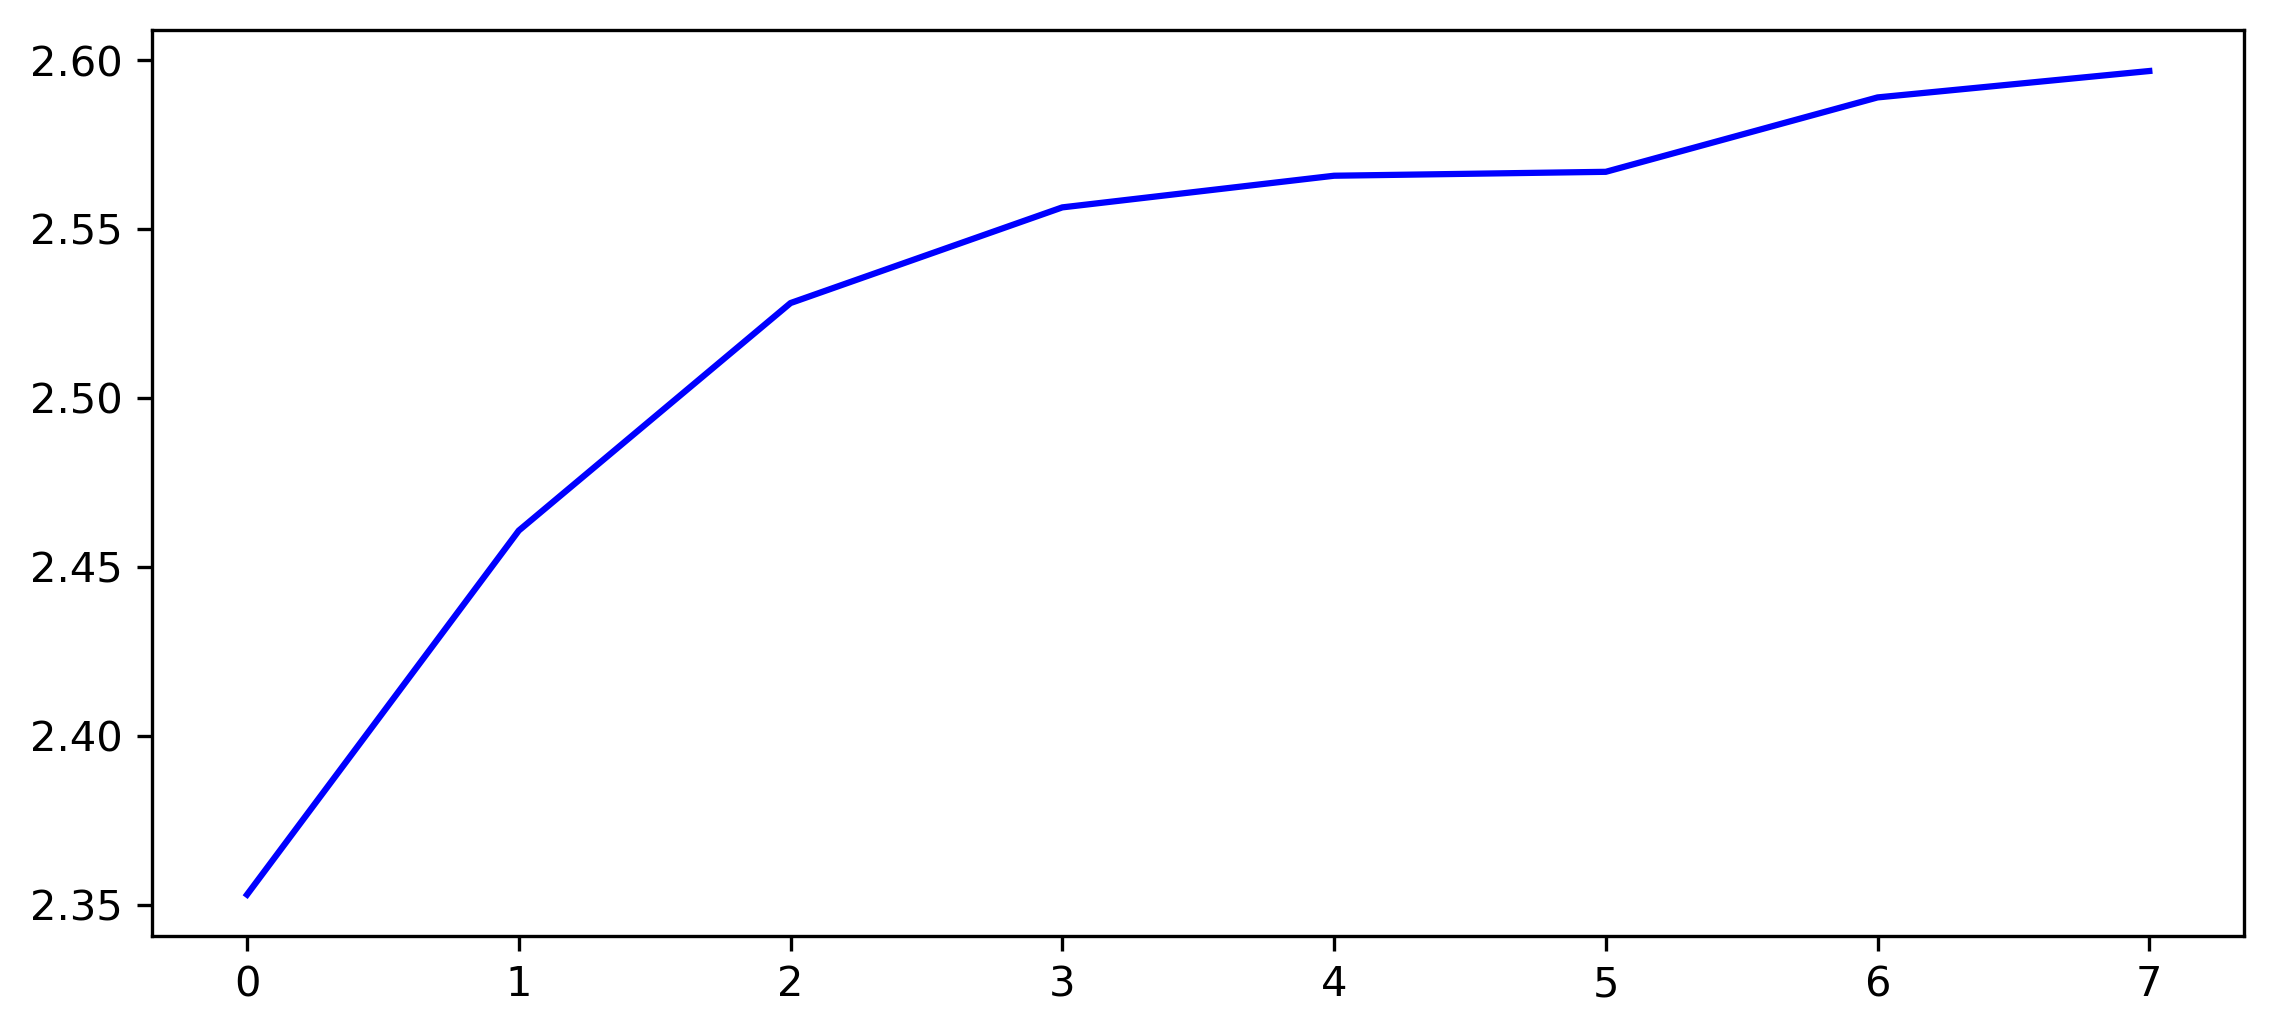

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')
x_vals = np.arange(s.shape[0])
ax.plot(x_vals,s[:,0], color = 'blue')

Well this looks quite odd, lets look at the trial-wise svd

In [82]:
u, s, vt = np.linalg.svd(in_out_matrix_trialwise_new, full_matrices=False)
u.shape, s.shape, vt.shape

((128, 7, 4), (128, 4), (128, 4, 4))

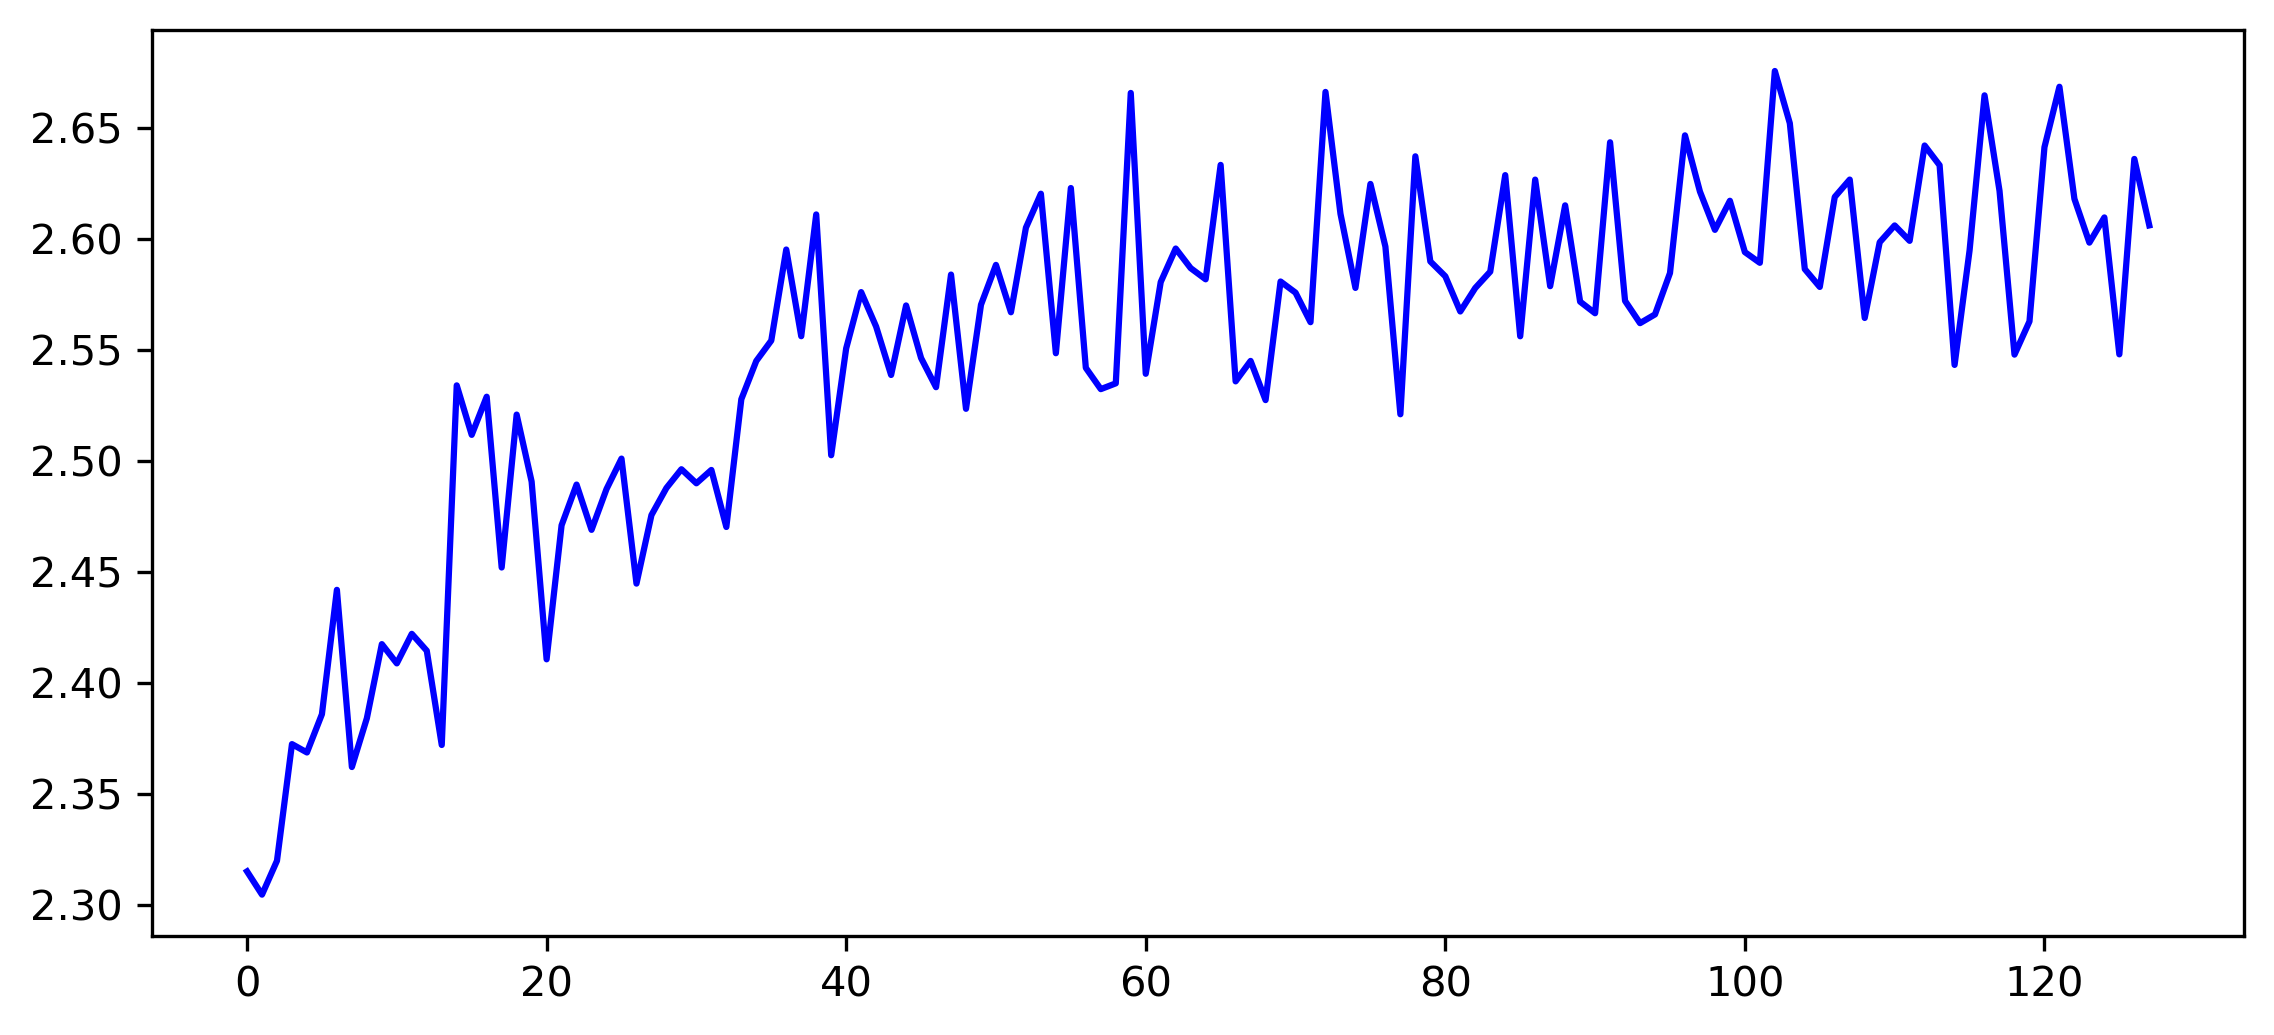

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')
x_vals = np.arange(s.shape[0])
ax.plot(x_vals,s[:,0], color = 'blue')